In [2]:
def analyze_factors():
    # العلاقة بين الاختبارات والحالات
    sns.lmplot(data=data, x='new_tests', y='new_cases')
    plt.savefig('../outputs/plots/tests_vs_cases.png')
    
    # تأثير التطعيم (إذا كانت البيانات متاحة)
    if 'people_vaccinated' in data.columns:
        sns.lineplot(data=data, x='date', y='people_vaccinated', color='green')

C:\Users\gknow\AppData\Local\Temp\ipykernel_32996\3606447295.py:30: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig(output_dir + 'time_series.png')  # حفظ الصورة
C:\Users\gknow\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


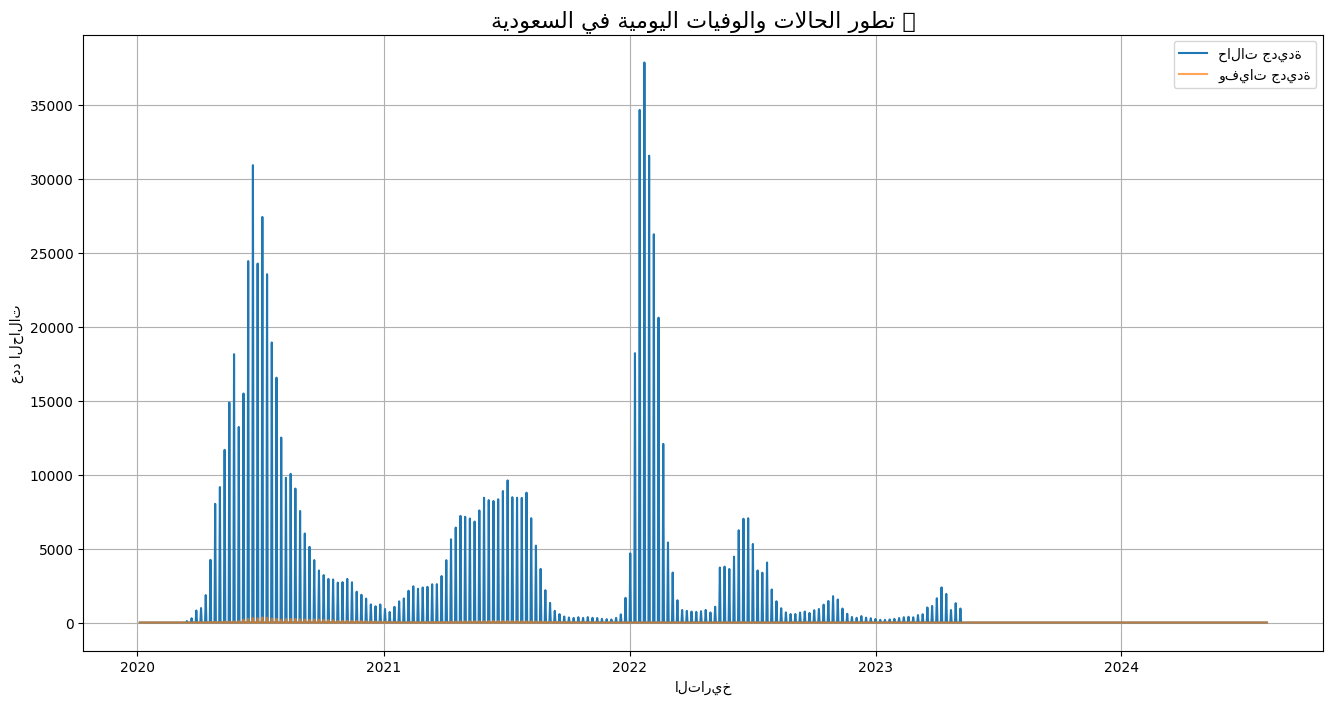

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import arabic_reshaper
from bidi.algorithm import get_display

# تحميل البيانات
df = pd.read_csv(r'C:\Users\gknow\Desktop\covid19_Analais\data\processed\saudi_covid_processed.csv')
df['date'] = pd.to_datetime(df['date'])

# إعادة ترتيب النص العربي للعنوان ليظهر بشكل صحيح
title_text = "📈 تطور الحالات والوفيات اليومية في السعودية"
reshaped_text = arabic_reshaper.reshape(title_text)
bidi_text = get_display(reshaped_text)

# تأكد من وجود مجلد حفظ الصور
output_dir = '../outputs/plots/'
os.makedirs(output_dir, exist_ok=True)

# رسم تطور الحالات والوفيات
plt.figure(figsize=(16, 8))
sns.lineplot(data=df, x='date', y='new_cases', label='حالات جديدة')
sns.lineplot(data=df, x='date', y='new_deaths', label='وفيات جديدة', alpha=0.7)
plt.title(bidi_text, fontsize=16)
plt.xlabel("التاريخ")
plt.ylabel("عدد الحالات")
plt.legend()
plt.grid()
plt.savefig(output_dir + 'time_series.png')  # حفظ الصورة
plt.show()


داشبورد تفاعلي لتطور الجائحة 

In [10]:
import plotly.express as px

fig = px.scatter(df, x='date', y='new_cases', 
                 size='new_deaths', color='new_tests',
                 hover_data=['total_cases'], 
                 title="📊 داشبورد تفاعلي لتطور الجائحة")
fig.show()

تأثير التطعيم الكامل على معدل الوفيات (لكل مليون نسمة) 


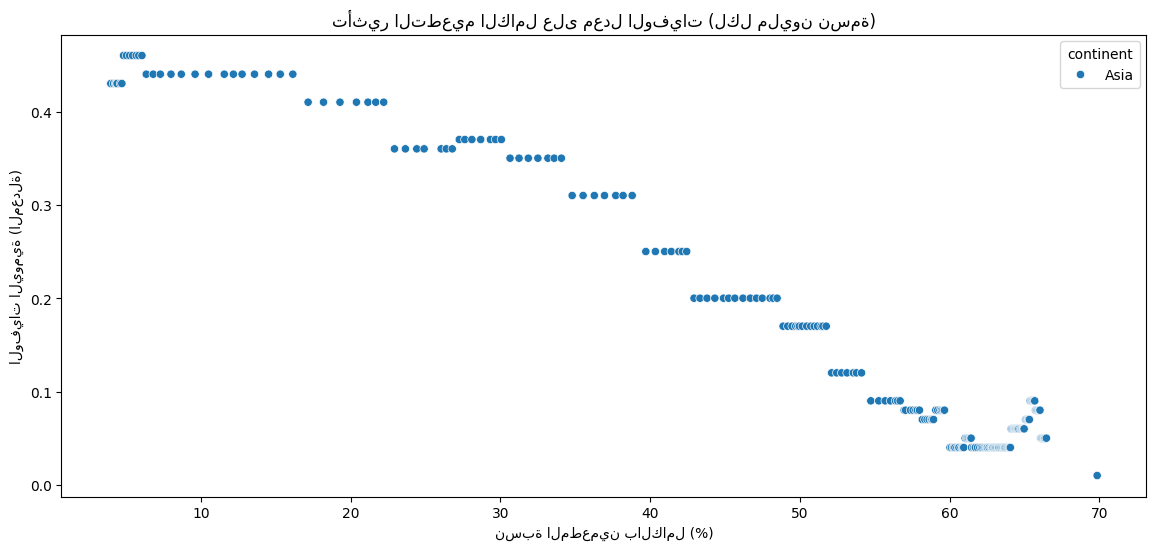

In [11]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x='people_fully_vaccinated_per_hundred', 
                y='new_deaths_smoothed_per_million', hue='continent')
plt.title("تأثير التطعيم الكامل على معدل الوفيات (لكل مليون نسمة)")
plt.xlabel("نسبة المطعمين بالكامل (%)")
plt.ylabel("الوفيات اليومية (المعدلة)")
plt.show()

علاقة العمر المتوسط بالوفيات الإجمالية (لكل مليون)

غالبا البيانات في الاعمار غير صحيحة 


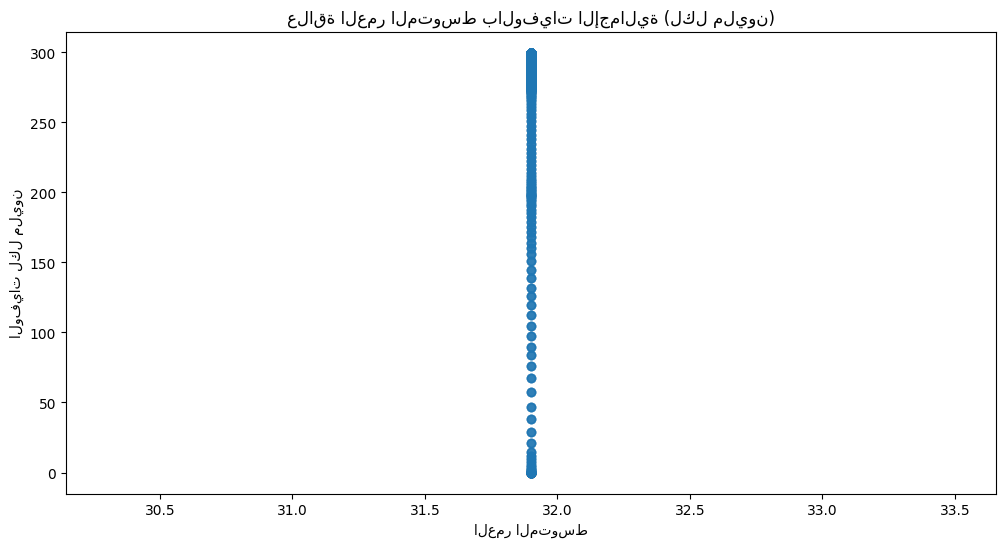

In [12]:
plt.figure(figsize=(12, 6))
sns.regplot(data=df, x='median_age', y='total_deaths_per_million', 
            scatter_kws={'alpha':0.3})
plt.title("علاقة العمر المتوسط بالوفيات الإجمالية (لكل مليون)")
plt.xlabel("العمر المتوسط")
plt.ylabel("الوفيات لكل مليون")
plt.show()